Name: Aayam Raj Shakya (as5160)

In [ ]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

8.1. We will experiment the K-Means algorithm following the first section of Chapter 11, Python Machine Learning, 3rd Ed., in a little bit different fashion.

(a) Make a dataset of 4 clusters (modifying the code on pp. 354–355).

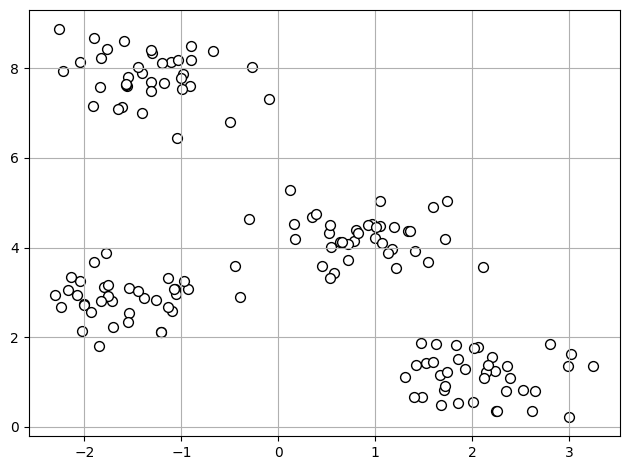

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=4, # no. of clusters
                 cluster_std=0.5,
                 shuffle=True,random_state=0)

plt.scatter(X[:,0], X[:,1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

(b) For K = 1, 2, · · · , 10, run the K-Means clustering algorithm with the initialization init=’k-means++’.

(c) For each K, compute the within-cluster SSE (distortion) for an elbow analysis to select an appropriate K. Note: Rather than using inertia_attribute, implement a function for the computation of distortion.

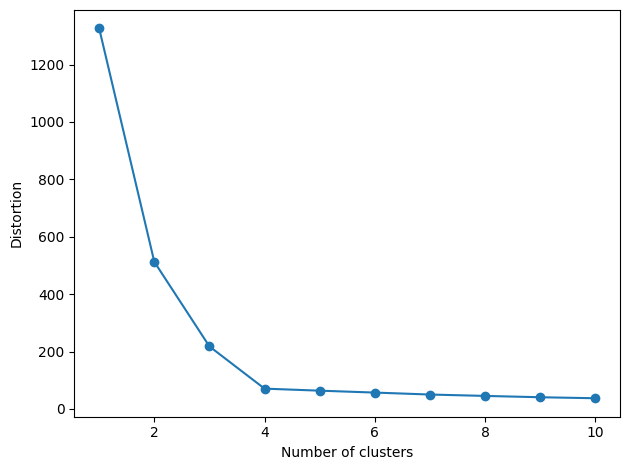

In [ ]:
# distortions = []
# for K in range(1, 11):
#     km = KMeans(n_clusters=K, init='k-means++', n_init=10,
#                 max_iter=300, tol=1e-04, random_state=0)
#     km.fit(X)
#     distortions.append(km.inertia_)
# plt.plot(range(1, 11), distortions, marker='o')


# REFERENCE: https://stackoverflow.com/a/66556490
from sklearn.cluster import KMeans

distortions = []
for K in range(1, 11):
    km = KMeans(n_clusters=K, init='k-means++', n_init=10,
                max_iter=300, tol=1e-04, random_state=0)
    kmeans = km.fit(X)
    cluster_centers = [X[kmeans.labels_ == i].mean(axis=0) for i in range(K)]
    clusterwise_sse = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # equal to no. of clusters
    for point, label in zip(X, kmeans.labels_):
      clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()
    distortions.append(np.sum(clusterwise_sse))

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

Based on the above plot, the appropriate no. of clusters (K) is 4.

(d) Produce silhouette plots for K = 3, 4, 5, 6.

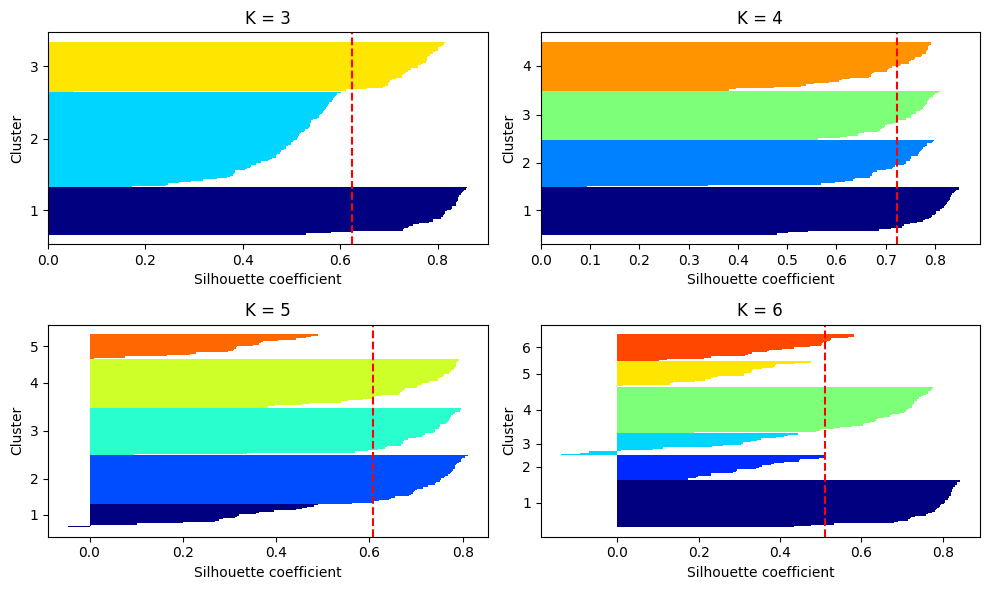

In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

K_list = [3,4,5,6]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

for K in range(len(K_list)):
  km = KMeans(n_clusters=K_list[K],
              init='k-means++',
              n_init=10,
              max_iter=300,
              tol=1e-04,
              random_state=0)
  y_km = km.fit_predict(X)

  cluster_labels = np.unique(y_km)
  n_clusters = cluster_labels.shape[0]
  silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
  y_ax_lower, y_ax_upper = 0, 0
  yticks = []
  for i, c in enumerate(cluster_labels):
      c_silhouette_vals = silhouette_vals[y_km == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(float(i) / n_clusters)
      ax[K//2, K%2].barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,
                         height=1.0, edgecolor='none', color=color)
      yticks.append((y_ax_lower + y_ax_upper) / 2.)
      y_ax_lower += len(c_silhouette_vals)

  # silhouette_avg = silhouette_score(X, y_km)
  silhouette_avg = np.mean(silhouette_vals)

  ax[K//2, K%2].axvline(silhouette_avg, color="red", linestyle="--")
  ax[K//2, K%2].set_yticks(yticks, cluster_labels + 1)
  ax[K//2, K%2].set_ylabel('Cluster')
  ax[K//2, K%2].set_xlabel('Silhouette coefficient')
  ax[K//2, K%2].set_title(f"K = {K_list[K]}")
  plt.tight_layout()
plt.show()

8.2. Now, let’s experiment DBSCAN, following Python Machine Learning, 3rd Ed., pp. 376–381.


(a) Produce a dataset having three half-moon-shaped structures each of which consists of 100 samples.

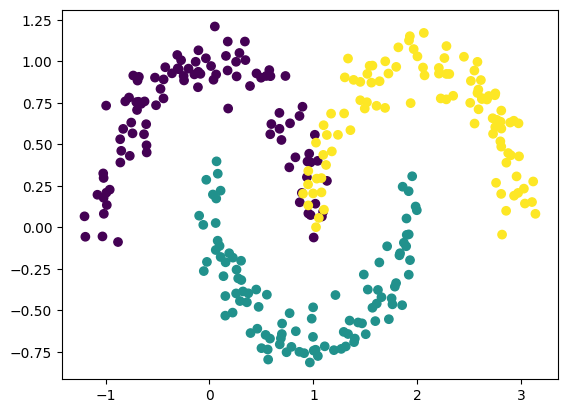

In [ ]:
# REFERENCE: https://stackoverflow.com/a/71734983
def make_many_moons(
    number_of_moons,
    sigma,
    radius,
    number_of_datapoints,
    y_shift = 0.3
):

    moons = []
    for y in range(number_of_moons):
        q = np.random.uniform(0,np.pi,size=number_of_datapoints)

        if y % 2 == 0:
            factor = 1
        else:
            factor = -1

        moon = np.zeros((number_of_datapoints, 3))
        moon[:,0] = (radius * np.cos(q)) + y
        moon[:,1] = (radius * np.sin(q) * factor) + (factor == -1) * y_shift
        moon[:,2] = y
        moons.append(moon)
        noise = np.random.normal(0, sigma, size=moon[:,:2].shape)
        moon[:,:2] += noise
    moons = np.concatenate(moons)
    return moons[:,:2], moons[:,2]


X, y = make_many_moons(
    number_of_moons=3,
    sigma=0.1,
    radius=1,
    number_of_datapoints=100,
    y_shift = 0.3)


plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

(b) Compare performances of K-Means, AGNES, and DBSCAN. (Set n_clusters=3 for K-Means and AGNES.)

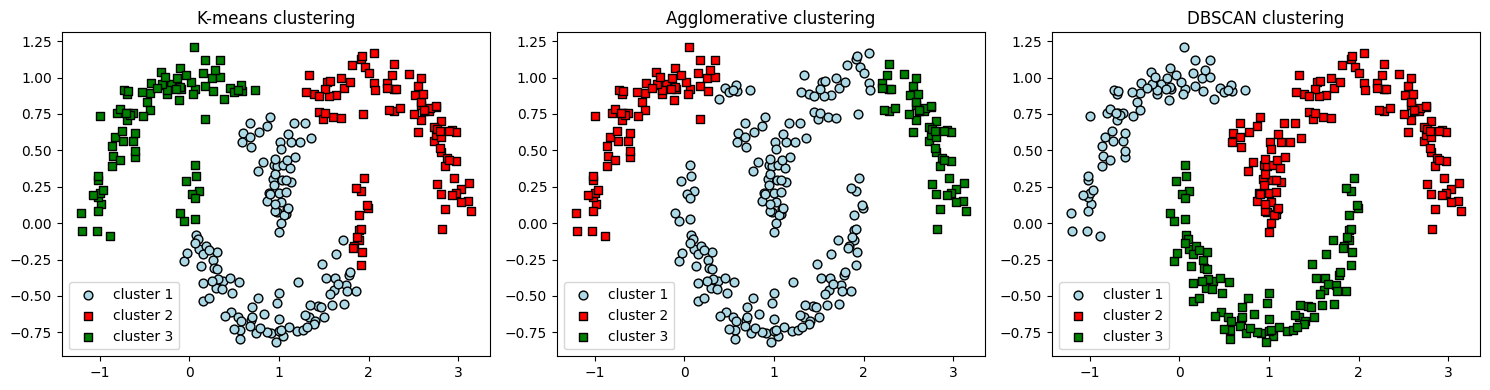

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

#--- KMeans clustering ---
km = KMeans(n_clusters=3, random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=40,
            c='lightblue',
            edgecolor='black',
            marker='o',
            label='cluster 1')
ax1.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=40,
            c='red',
            edgecolor='black',
            marker='s',
            label='cluster 2')
ax1.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=40,
            c='green',
            edgecolor='black',
            marker='s',
            label='cluster 3')
ax1.set_title('K-means clustering')
ax1.legend()

#--- AGNES clustering ---
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                             metric='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],
            X[y_ac==0,1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')
ax2.scatter(X[y_ac==1,0],
            X[y_ac==1,1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')
ax2.scatter(X[y_ac==2,0],
            X[y_ac==2,1],
            c='green',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 3')
ax2.set_title('Agglomerative clustering')
ax2.legend()


#--- DBSCAN Clustering ---
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
y_db = db.fit_predict(X)
ax3.scatter(X[y_db==0,0],
            X[y_db==0,1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')
ax3.scatter(X[y_db==1,0],
            X[y_db==1,1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')
ax3.scatter(X[y_db==2,0],
            X[y_db==2,1],
            c='green',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 3')
ax3.set_title('DBSCAN clustering')
ax3.legend()

plt.tight_layout()
plt.show()

(c) For K-Means and AGNES, what if you choose n_clusters much larger than 3 (for
example, 9, 12, 15)?

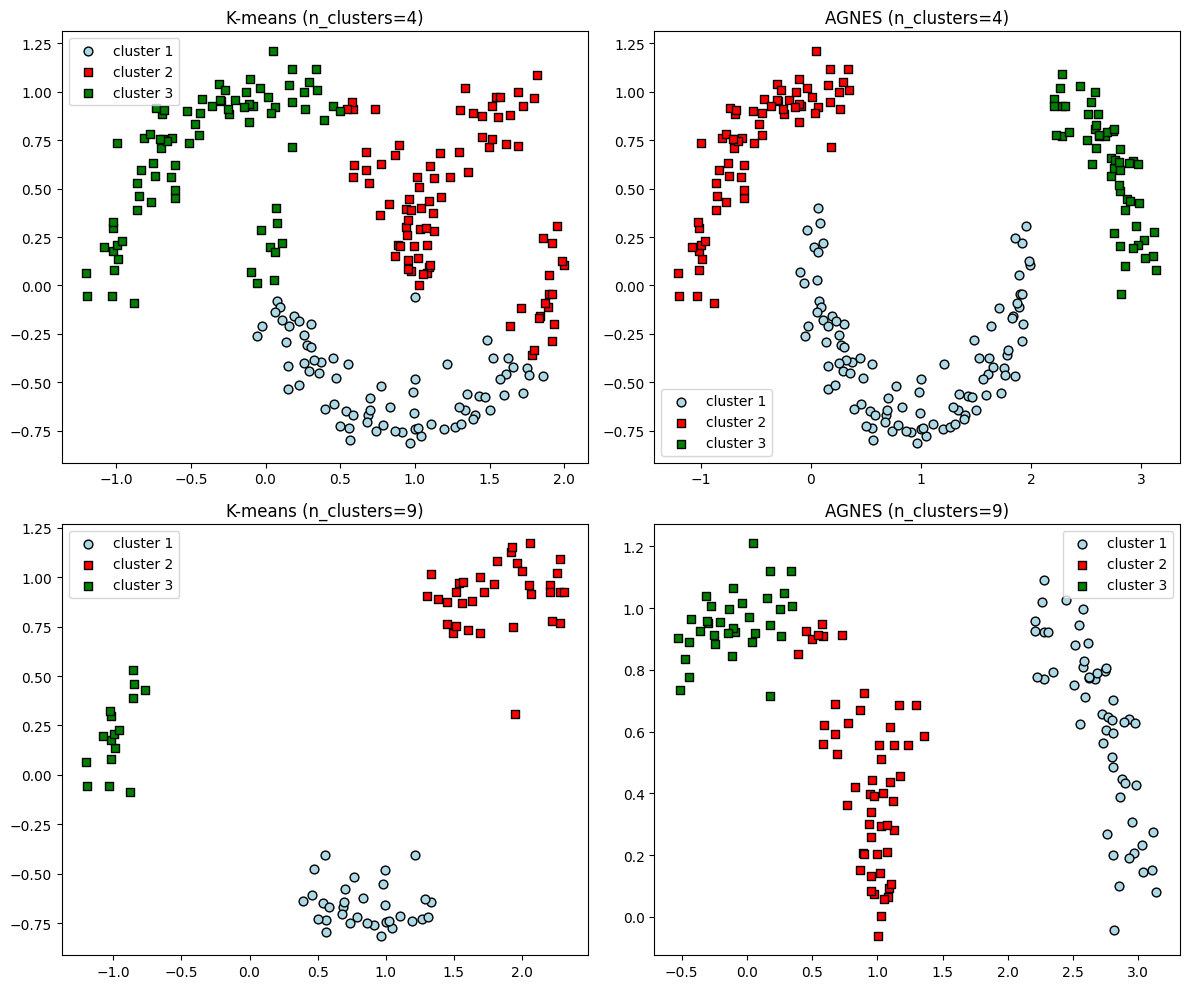

In [ ]:
# f, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, figsize=(10, 4))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12, 10))


#--- KMeans clustering ---
km = KMeans(n_clusters=4, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=40, c='lightblue', edgecolor='black', marker='o', label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=40, c='red', edgecolor='black', marker='s', label='cluster 2')
ax1.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=40, c='green', edgecolor='black', marker='s', label='cluster 3')
ax1.set_title('K-means (n_clusters=4)')
ax1.legend()

km = KMeans(n_clusters=9, random_state=0)
y_km = km.fit_predict(X)
ax3.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=40, c='lightblue', edgecolor='black', marker='o', label='cluster 1')
ax3.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=40, c='red', edgecolor='black', marker='s', label='cluster 2')
ax3.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=40, c='green', edgecolor='black', marker='s', label='cluster 3')
ax3.set_title('K-means (n_clusters=9)')
ax3.legend()


#--- AGNES clustering ---
ac = AgglomerativeClustering(n_clusters=4, metric='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0], X[y_ac==0,1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac==1,0], X[y_ac==1,1], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')
ax2.scatter(X[y_ac==2,0], X[y_ac==2,1],c='green', edgecolor='black', marker='s', s=40, label='cluster 3')
ax2.set_title('AGNES (n_clusters=4)')
ax2.legend()

ac = AgglomerativeClustering(n_clusters=9, metric='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax4.scatter(X[y_ac==0,0], X[y_ac==0,1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
ax4.scatter(X[y_ac==1,0], X[y_ac==1,1], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')
ax4.scatter(X[y_ac==2,0], X[y_ac==2,1],c='green', edgecolor='black', marker='s', s=40, label='cluster 3')
ax4.set_title('AGNES (n_clusters=9)')
ax4.legend()


plt.tight_layout()
plt.show()

Setting ```n_clusters``` any higher than the actual number of clusters in the dataset (3; three half-moon-shaped structures) will distort the whole structure of the dataset as seen above.

(d) Again, for K-Means and AGNES, perform an elbow analysis to select an appropriate K.

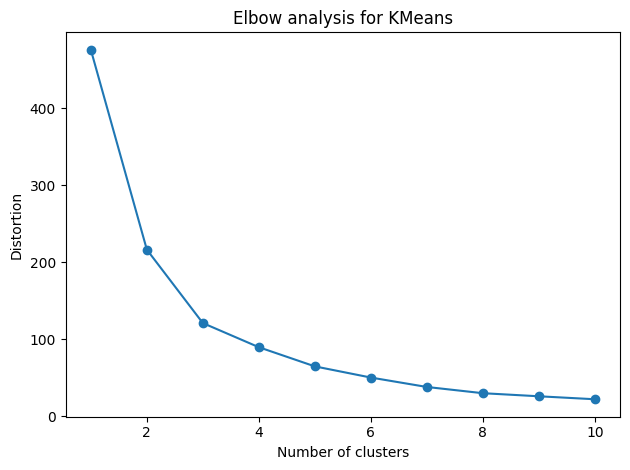

In [ ]:
# For this cell, the dataset X comes from the 8.2a cell (three half-moons)

# -- Optimal cluster analysis for KMeans ---
distortions = []
for K in range(1, 11):
    km = KMeans(n_clusters=K, init='k-means++', n_init=10,
                max_iter=300, tol=1e-04, random_state=0)
    kmeans = km.fit(X)
    cluster_centers = [X[kmeans.labels_ == i].mean(axis=0) for i in range(K)]
    clusterwise_sse = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # equal to no. of clusters
    for point, label in zip(X, kmeans.labels_):
      clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()
    distortions.append(np.sum(clusterwise_sse))

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow analysis for KMeans')
plt.tight_layout()
plt.show()

Based on this elbow analysis plot for KMeans clustering, we can conclude that the safe number of clusters is either 3 or 4.

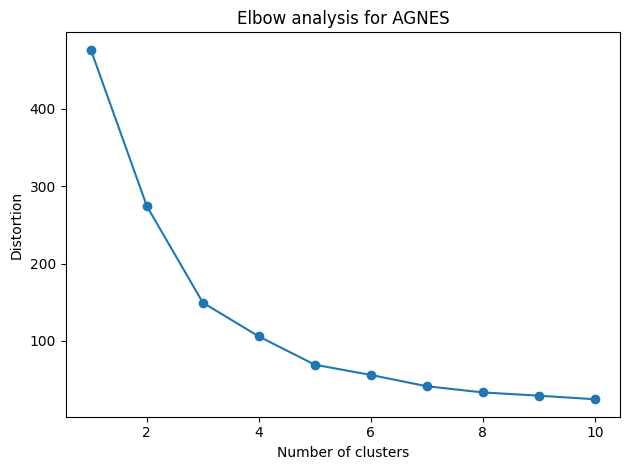

In [ ]:
# -- Optimal cluster analysis for AGNES ---
distortions = []
for K in range(1, 11):
    ac = AgglomerativeClustering(n_clusters=K,
                                 metric='euclidean', linkage='complete')
    # y_ac = ac.fit_predict(X)
    y_ac = ac.fit(X)
    # cluster_centers = [X[y_ac == i].mean(axis=0) for i in range(K)]
    cluster_centers = [X[y_ac.labels_ == i].mean(axis=0) for i in range(K)]
    clusterwise_sse = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    # for point, label in zip(X, y_ac):
    for point, label in zip(X, y_ac.labels_):
      clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()
    distortions.append(np.sum(clusterwise_sse))

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow analysis for AGNES')
plt.tight_layout()
plt.show()

Based on this elbow analysis plot for AGNES clustering, we can conclude that the safe number of clusters is either 4 or 5.